# **A Jupyter Notebook away of forecasting 2.0**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import statistics as stats


plt.ion()
sns.set_theme(style="darkgrid")

In [3]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

/home/agonzalez/miniconda3/envs/mds7202/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#interactive data visualization
import plotly.express as px
import plotly.figure_factory as ff

## **Data**

In [28]:
maitenes_df = pd.read_csv('maitenes.csv')
maitenes_df['Unnamed: 0'] = pd.to_datetime(maitenes_df['Unnamed: 0'], format= '%Y/%m/%d')
maitenes_df.rename(columns={'Unnamed: 0': 'date'},inplace = True)
maitenes_df.head()

date   SO2    NO2       NO       NOX    O3    CO
0 2017-09-06 18:00:00  3.22   2.16  2.01888   4.18258  21.0  0.22
1 2017-09-06 19:00:00  3.58   3.25  2.20725   5.46078  18.0  0.25
2 2017-09-06 20:00:00  7.39  13.01  2.41338  15.42390   9.0  0.29
3 2017-09-06 21:00:00  6.40  12.33  2.38637  14.72000  10.0  0.28
4 2017-09-06 22:00:00  4.77   7.22  2.31295   9.53500  13.0  0.27

In [29]:
SO2 = maitenes_df.loc[maitenes_df['SO2']>50]


## **Con SO2 > 50**

Se consideran todos los datos disponibles

In [30]:
subset = SO2[['date','SO2']]
subset = subset.rename(columns= {'date':'ds', 'SO2':'y'})

In [31]:
#for forecast
m = Prophet()
m.fit(subset)


00:52:26 - cmdstanpy - INFO - Chain [1] start processing
00:52:26 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
future = m.make_future_dataframe(periods=10)
future.tail()

ds
1741 2022-08-15 14:00:00
1742 2022-08-16 14:00:00
1743 2022-08-17 14:00:00
1744 2022-08-18 14:00:00
1745 2022-08-19 14:00:00

In [33]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
1741 2022-08-15 14:00:00  69.955987   23.271049  115.454025
1742 2022-08-16 14:00:00  71.941634   27.321486  119.128732
1743 2022-08-17 14:00:00  74.223135   28.454411  121.062590
1744 2022-08-18 14:00:00  71.287252   24.323046  116.818383
1745 2022-08-19 14:00:00  69.362983   20.956893  113.372286

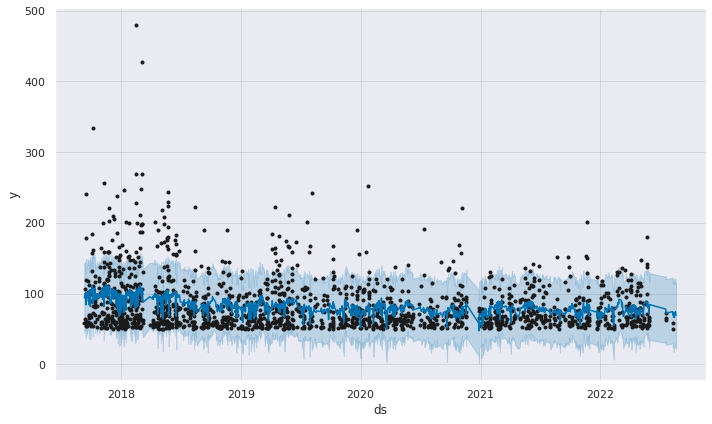

In [34]:
fig1 = m.plot(forecast)

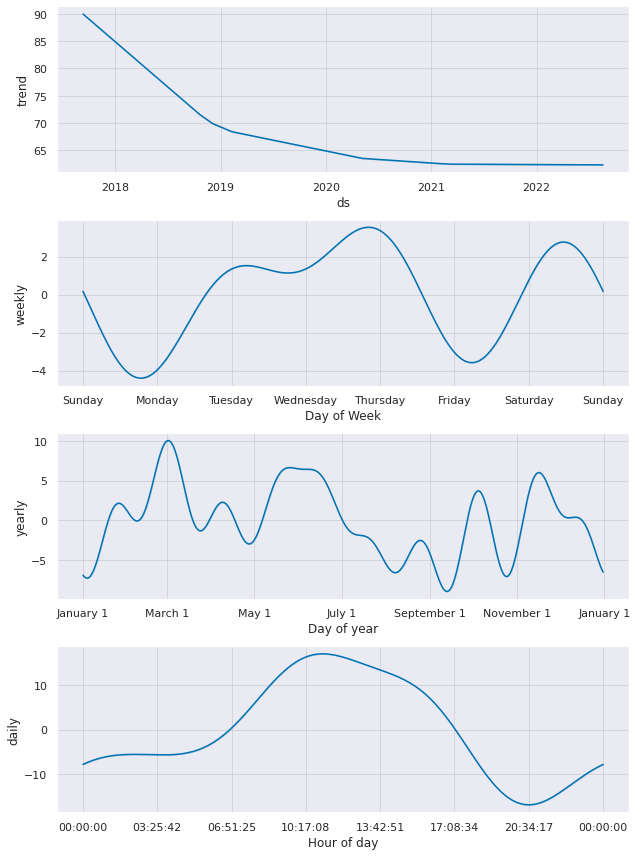

In [35]:
fig2 = m.plot_components(forecast)

In [36]:
plot_plotly(m, forecast)

In [37]:
plot_components_plotly(m, forecast)


## **Prophet**

In [38]:
SO2 = SO2[SO2['date'].dt.year > 2019]
SO2.head()

date    SO2    NO2        NO       NOX    O3    CO
20310 2020-01-01 00:00:00  57.37  17.71  21.97980  39.68880  14.0  0.32
20311 2020-01-01 01:00:00  76.72  19.48  38.35950  57.83830  13.0  0.32
20326 2020-01-01 16:00:00  51.30   3.89   2.31667   6.20182  22.0  0.15
20372 2020-01-03 14:00:00  67.53   4.19   4.77815   8.96445  18.0  0.11
20395 2020-01-04 13:00:00  60.05   6.45   8.96095  15.40860  19.0  0.15

In [39]:
subset = SO2[['date','SO2']]
subset = subset.rename(columns= {'date':'ds', 'SO2':'y'})

In [40]:
#for forecast
m = Prophet()
m.fit(subset)


00:52:30 - cmdstanpy - INFO - Chain [1] start processing
00:52:30 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
future = m.make_future_dataframe(periods=10)
future.tail()

ds
703 2022-08-15 14:00:00
704 2022-08-16 14:00:00
705 2022-08-17 14:00:00
706 2022-08-18 14:00:00
707 2022-08-19 14:00:00

In [42]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
703 2022-08-15 14:00:00  77.043724   48.694055  109.967850
704 2022-08-16 14:00:00  72.763929   41.781910  106.225824
705 2022-08-17 14:00:00  68.681379   37.618346   96.637842
706 2022-08-18 14:00:00  76.442287   42.652203  105.757481
707 2022-08-19 14:00:00  72.110685   39.866126  102.640055

In [71]:
SO2

date    SO2    NO2        NO        NOX    O3    CO
20310 2020-01-01 00:00:00  57.37  17.71  21.97980   39.68880  14.0  0.32
20311 2020-01-01 01:00:00  76.72  19.48  38.35950   57.83830  13.0  0.32
20326 2020-01-01 16:00:00  51.30   3.89   2.31667    6.20182  22.0  0.15
20372 2020-01-03 14:00:00  67.53   4.19   4.77815    8.96445  18.0  0.11
20395 2020-01-04 13:00:00  60.05   6.45   8.96095   15.40860  19.0  0.15
...                   ...    ...    ...       ...        ...   ...   ...
42642 2022-07-19 12:00:00  61.85  21.24  62.39470   83.63240   3.0  0.61
42643 2022-07-19 13:00:00  66.01  25.44  77.81300  103.25400   3.0  0.42
42645 2022-07-19 15:00:00  72.14  30.35  71.11330  101.46200   3.0  0.34
43145 2022-08-09 11:00:00  50.10  19.13  91.75850  110.89300   3.0  0.56
43148 2022-08-09 14:00:00  58.85  21.37  33.27820   54.64930   6.0  0.75

[698 rows x 7 columns]

In [73]:
results = pd.concat([SO2.set_index('date')['SO2'],forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']]],axis=1)

In [75]:
results['error'] = results['SO2'] - results['yhat']

In [76]:
results["uncertainty"] = results['yhat_upper'] - results['yhat_lower']

In [77]:
results[results['error'].abs() >  1.5*results['uncertainty']]

SO2       yhat  yhat_lower  yhat_upper       error  \
2020-01-23 14:00:00  252.38  85.704838   56.150138  118.873779  166.675162   
2020-07-13 12:00:00  191.11  81.067627   49.114380  114.220024  110.042373   
2020-10-26 09:00:00  168.63  78.116525   49.150440  109.354461   90.513475   
2020-11-05 11:00:00  221.16  94.158642   62.395564  123.970255  127.001358   
2021-11-20 15:00:00  200.93  86.165160   54.291959  116.489162  114.764840   
2022-05-24 11:00:00  180.42  82.137531   51.200729  111.990849   98.282469   

                     uncertainty  
2020-01-23 14:00:00    62.723641  
2020-07-13 12:00:00    65.105645  
2020-10-26 09:00:00    60.204021  
2020-11-05 11:00:00    61.574691  
2021-11-20 15:00:00    62.197203  
2022-05-24 11:00:00    60.790120

In [90]:
results['anomaly'] = results.apply(lambda x: 'Yes' if(np.abs(x['error']) >  1*x['uncertainty']) else 'No', axis=1)

In [98]:
results.loc[results.SO2 > 130].count()

SO2            30
yhat           30
yhat_lower     30
yhat_upper     30
error          30
uncertainty    30
anomaly        30
dtype: int64

In [99]:
results.groupby('anomaly').count()

SO2  yhat  yhat_lower  yhat_upper  error  uncertainty
anomaly                                                       
No       680   690         690         690    680          690
Yes       18    18          18          18     18           18

In [103]:
results.index.rename('Fecha',inplace=True)

In [104]:
fig = px.scatter(results.reset_index(), x='Fecha', y='SO2', color='anomaly', title='Detección de anomalías para SO2')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

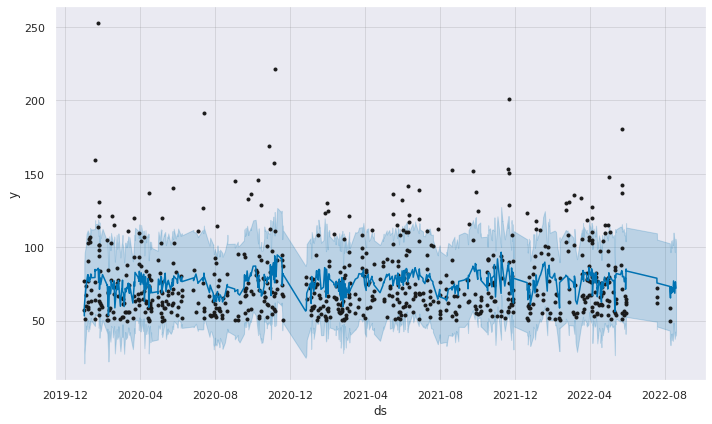

In [43]:
fig1 = m.plot(forecast)

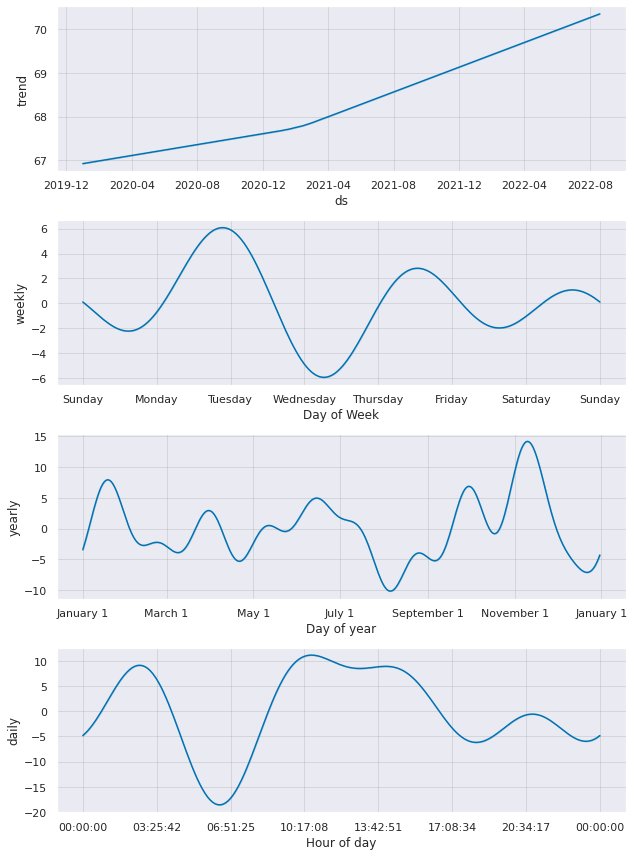

In [44]:
fig2 = m.plot_components(forecast)

In [45]:
plot_plotly(m, forecast)

In [46]:
plot_components_plotly(m, forecast)
